The database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?datasetId=572515&searchQuery=clust

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from bs4 import BeautifulSoup
nltk.download("stopwords")   
from nltk.corpus import stopwords 
from nltk.corpus import wordnet
from sklearn.metrics import confusion_matrix
import plotly.express as px
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing import text,sequence
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
!pip install transformers
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import keras
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# df_fake = pd.read_csv('/content/drive/MyDrive/Fake.csv', error_bad_lines=False) ---/content/drive/MyDrive/True.csv

df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv", 
                 delimiter=",", 
                 engine="python",
                 error_bad_lines=False,  
                 encoding='utf-8')
df_true = pd.read_csv("/content/drive/MyDrive/True.csv", 
                 delimiter=",", 
                 engine="python",
                 error_bad_lines=False,  
                 encoding='utf-8')


<ipython-input-4-f5f6d67f99de>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv",
Skipping line 4349: ',' expected after '"'
Skipping line 15723: ',' expected after '"'
Skipping line 21418: ',' expected after '"'
Skipping line 3959: Expected 4 fields in line 3959, saw 8
Skipping line 15338: Expected 4 fields in line 15338, saw 12
Skipping line 21190: Expected 4 fields in line 21190, saw 85
<ipython-input-4-f5f6d67f99de>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_true = pd.read_csv("/content/drive/MyDrive/True.csv",


In [5]:
print(df_fake.shape)

(36326, 4)


In [6]:
print(df_true.shape)

(21417, 4)


In [7]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [8]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [9]:
# print the distribution of article lengths for real news
df_true['article_length'] = df_true['text'].apply(lambda x: len(x.split()))
print(df_true['article_length'].describe())

count    21417.000000
mean       385.640099
std        274.006204
min          0.000000
25%        148.000000
50%        359.000000
75%        525.000000
max       5172.000000
Name: article_length, dtype: float64


In [10]:
# print the distribution of article lengths for fake news
df_fake['article_length'] = df_fake['text'].apply(lambda x: len(x.split()))
print(df_fake['article_length'].describe())

count    36326.000000
mean       417.104388
std        451.240460
min          0.000000
25%        197.000000
50%        344.000000
75%        504.000000
max       8135.000000
Name: article_length, dtype: float64


In [11]:
# Check for missing values
print('Missing values in fake news dataset:', df_fake.isnull().sum())
print('Missing values in real news dataset:', df_true.isnull().sum())

Missing values in fake news dataset: title             0
text              0
subject           0
date              1
article_length    0
dtype: int64
Missing values in real news dataset: title             0
text              0
subject           0
date              0
article_length    0
dtype: int64


In [12]:
#Counting by Subjects for Fake News
for key,count in df_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{df_fake.shape[0]}")

politics:	12099
News:	9048
left-news:	8917
Government News:	3140
US_News:	1565
Middle-east:	1556
Nov 22, 2016:	1
Total Records:	36326


<ipython-input-12-fae6f6aeb9fa>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,count in df_fake.subject.value_counts().iteritems():


In [13]:
#Counting by Subjects for True News
for key,count in df_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{df_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


<ipython-input-13-4112901a56c3>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,count in df_true.subject.value_counts().iteritems():


In [14]:
# Adding class Information
df_true["target"] = 1
df_fake["target"] = 0

In [15]:
data = df_true.append(df_fake, ignore_index=True).reset_index(drop=True)


<ipython-input-15-1e4a07bfbb47>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_true.append(df_fake, ignore_index=True).reset_index(drop=True)


In [16]:
data.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57743 entries, 0 to 57742
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           57743 non-null  object
 1   text            57743 non-null  object
 2   subject         57743 non-null  object
 3   date            57742 non-null  object
 4   article_length  57743 non-null  int64 
 5   target          57743 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.6+ MB


In [17]:
data.duplicated().sum()

13029

In [18]:
data.drop_duplicates(inplace = True)



In [19]:
data.duplicated().sum()

0

In [20]:
#look class frequencies of 'news_class' variable

grouped_n = data.groupby("target").count()
grouped_n["title"]

target
0    23503
1    21211
Name: title, dtype: int64

In [21]:
#look class frequencies of 'subject' variable

data["subject"].value_counts()

politicsNews       11220
worldnews           9991
News                9048
politics            6846
left-news           4469
Government News     1573
US_News              786
Middle-east          780
Nov 22, 2016           1
Name: subject, dtype: int64

In [22]:
data.head(10)

,title,text,subject,date,article_length,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",624,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",376,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",852,1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",599,1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",538,1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",135,1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",100,1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",67,1


In [23]:
##Data Visualization

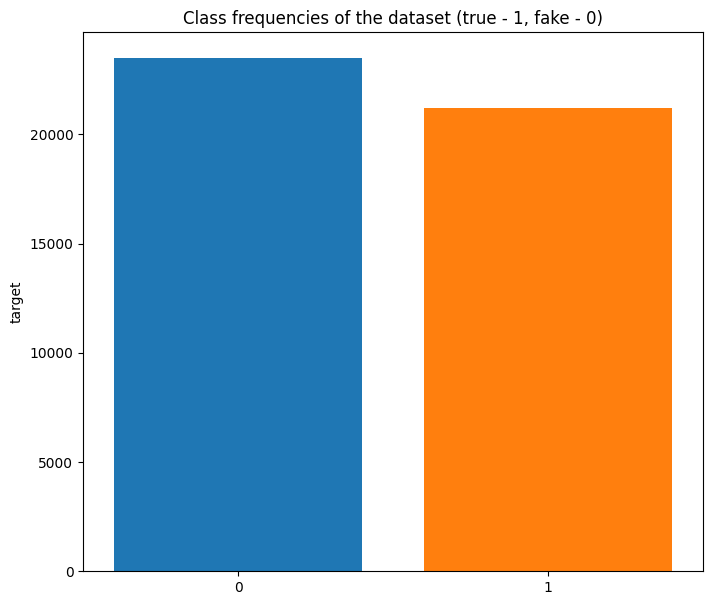

In [24]:
plt.figure(figsize = [8, 7], clear = True, facecolor = 'white')

sns.barplot(x = data["target"].value_counts().index,
            y = data["target"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

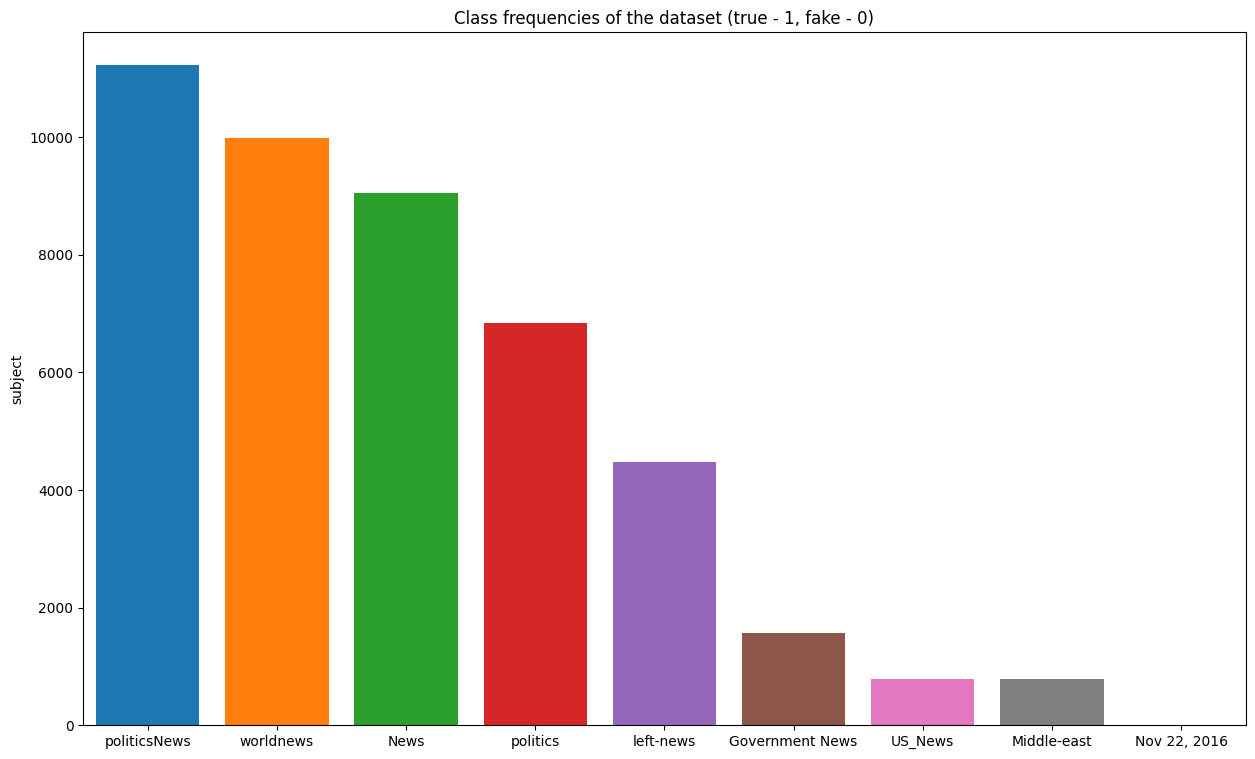

In [25]:
plt.figure(figsize = [15, 9], clear = True, facecolor = 'white')
sns.barplot(x = data["subject"].value_counts().index,
            y = data["subject"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

In [26]:


fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "counts in news_class",
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [27]:
fig = px.pie(data, names = "subject", title = "counts in news_class", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

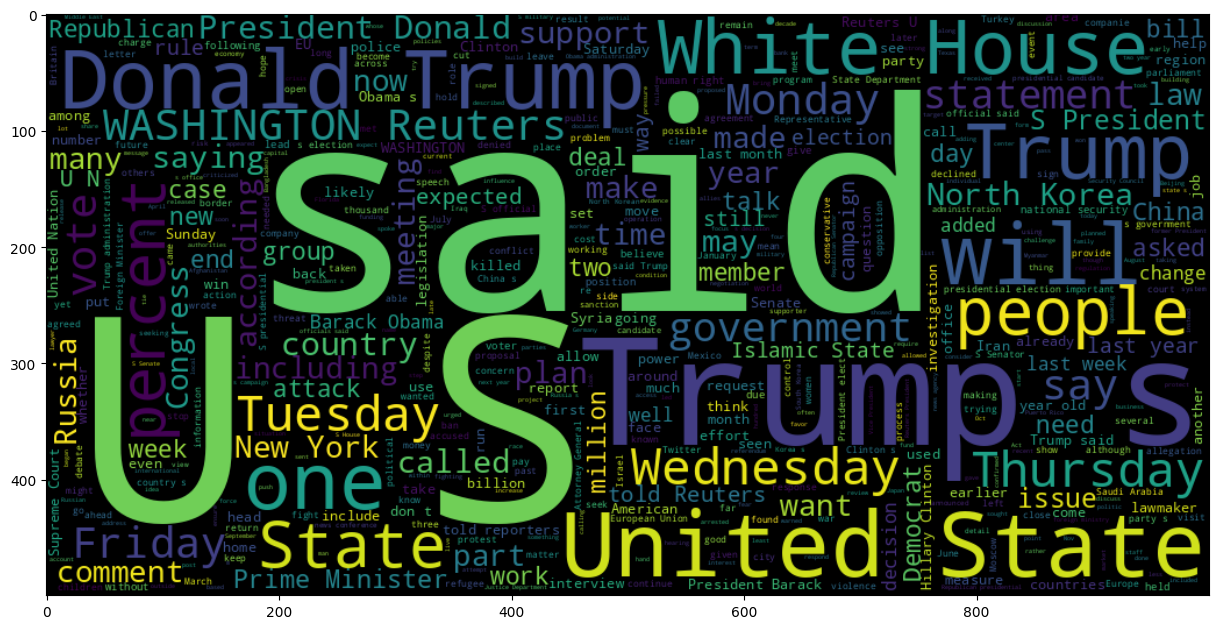

In [28]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

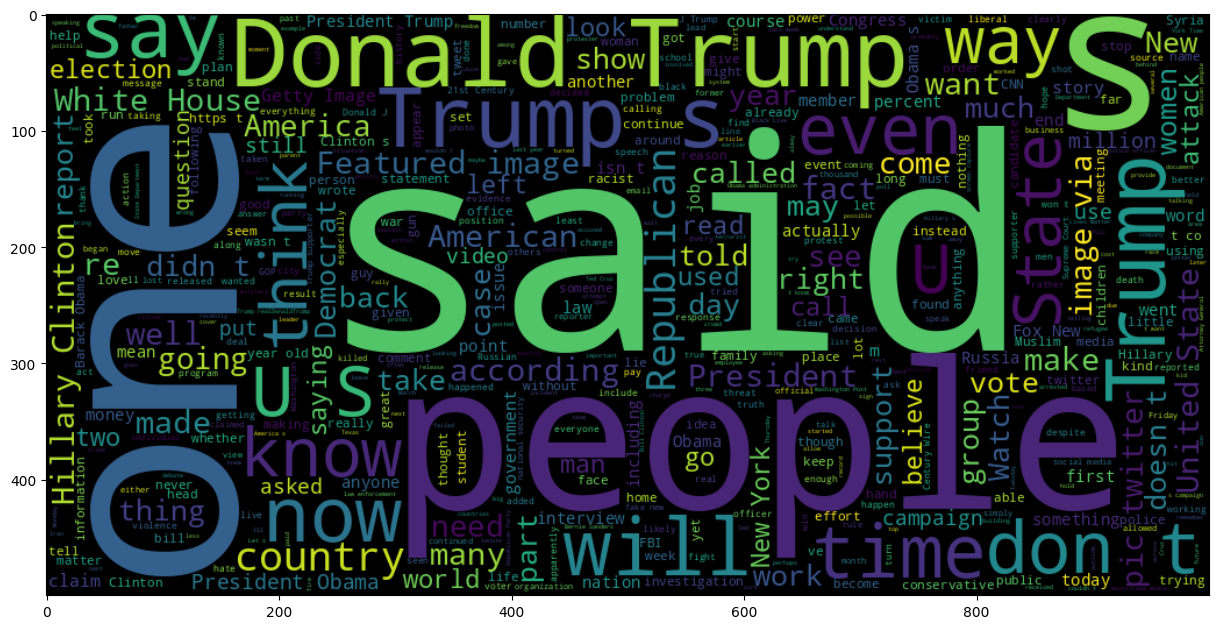

In [29]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

politicsNews       11220
worldnews           9991
News                9048
politics            6846
left-news           4469
Government News     1573
US_News              786
Middle-east          780
Nov 22, 2016           1
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

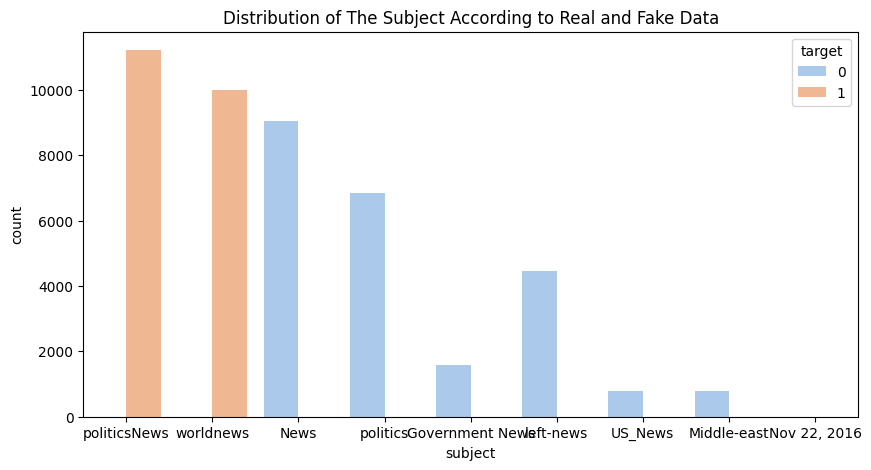

In [30]:
print(data.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [31]:
#Data Cleaning

In [32]:
data['text']= data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
del data['article_length']



In [33]:
data.sample(5)

,text,target
7862,Obama to consider 'proportional' response to R...,1
42844,Burn! George Clooney Turns On Hillary After Sa...,0
9600,"Exclusive: Trump surges in support, almost eve...",1
18985,"Two worlds of Labour, Britain's opposition par...",1
17287,Spain High Court jails two Catalan separatist ...,1


In [34]:
data = data.sample(20000, random_state=42)

In [35]:
data.reset_index(drop=True, inplace=True)

In [36]:
data.head()

,text,target
0,Senate takes up broadband privacy repeal WASHI...,1
1,The very idea of a President Trump scares some...,1
2,Soccer star Weah and VP Boakai near Liberia pr...,1
3,"U.S. Republicans working on Medicaid, tax cred...",1
4,White House blasts Republicans over House Beng...,1


In [37]:


fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "counts in news_class",
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [38]:
#Removal of HTML Contents

In [39]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
nltk.download("stopwords")   
from nltk.corpus import stopwords  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

def delete_numbers(text):
    return re.sub("\d"," ",text)

#Convert text to lower case
def convert_to_lower(text):
    return text.lower()

#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = delete_numbers(text)
    text = convert_to_lower(text)
    return text

#Apply function on text column
data['text']=data['text'].apply(cleaning)

<ipython-input-41-9c708baff302>:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [42]:
# stop_words = set(stopwords.words("english"))

#Load the NLTK stop words
stop_words = set(stopwords.words("english"))



stop = stopwords.words('english')
data['clean_text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()



,text,target,clean_text
0,senate takes up broadband privacy repeal washi...,1,senate takes broadband privacy repeal washingt...
1,the very idea of a president trump scares some...,1,idea president trump scares bolsters others as...
2,soccer star weah and vp boakai near liberia pr...,1,soccer star weah vp boakai near liberia presid...
3,u s republicans working on medicaid tax cred...,1,u republicans working medicaid tax credit chan...
4,white house blasts republicans over house beng...,1,white house blasts republicans house benghazi ...


In [43]:

# Define a function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for word in word_tokenize(text):
        lemma = lemmatizer.lemmatize(word, pos=wordnet.VERB) # using verb POS tag for lemmatization
        lemma = lemmatizer.lemmatize(lemma, pos=wordnet.NOUN) # using noun POS tag for lemmatization
        lemmatized_text.append(lemma)
    return ' '.join(lemmatized_text)

# Apply lemmatization to the text data
data['clean_text'] = data['clean_text'].apply(lemmatize_text)


In [44]:
data.sample(5)

,text,target,clean_text
18267,it s all his fault italy s left obsessed with...,1,fault italy leave ob renzi foe rome reuters na...
8399,u s voters deliver mixed results on gun contr...,1,u voter deliver mix result gun control measure...
11674,scotus won t uphold nc s voter suppression la...,0,scotus uphold nc voter suppression law mccrory...
18374,nigel farage on trump merkel powwow merkel s ...,0,nigel farage trump merkel powwow merkel decisi...
7683,britain preparing to transfer million poun...,1,britain prepare transfer million pound iran te...


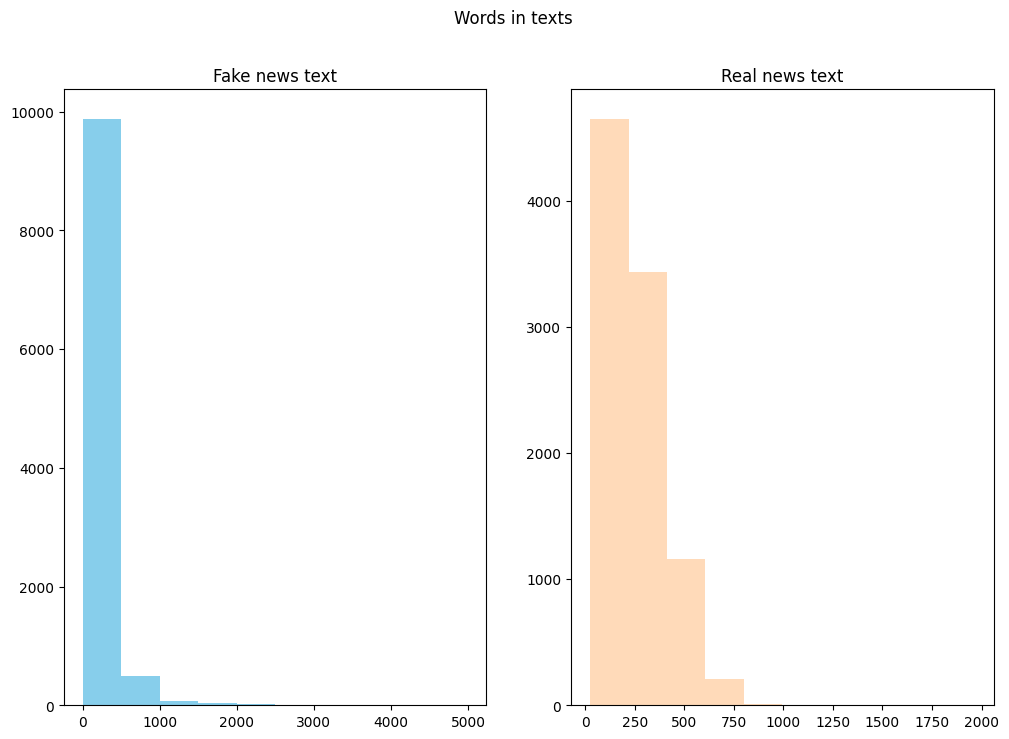

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['clean_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['clean_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [46]:
texts = ' '.join(data['clean_text'])

In [47]:
string = texts.split(" ")

In [48]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

           word  count
0        (say,)  77448
1      (trump,)  66458
2          (u,)  34925
3      (state,)  29254
4  (president,)  26212


<Axes: xlabel='count', ylabel='word'>

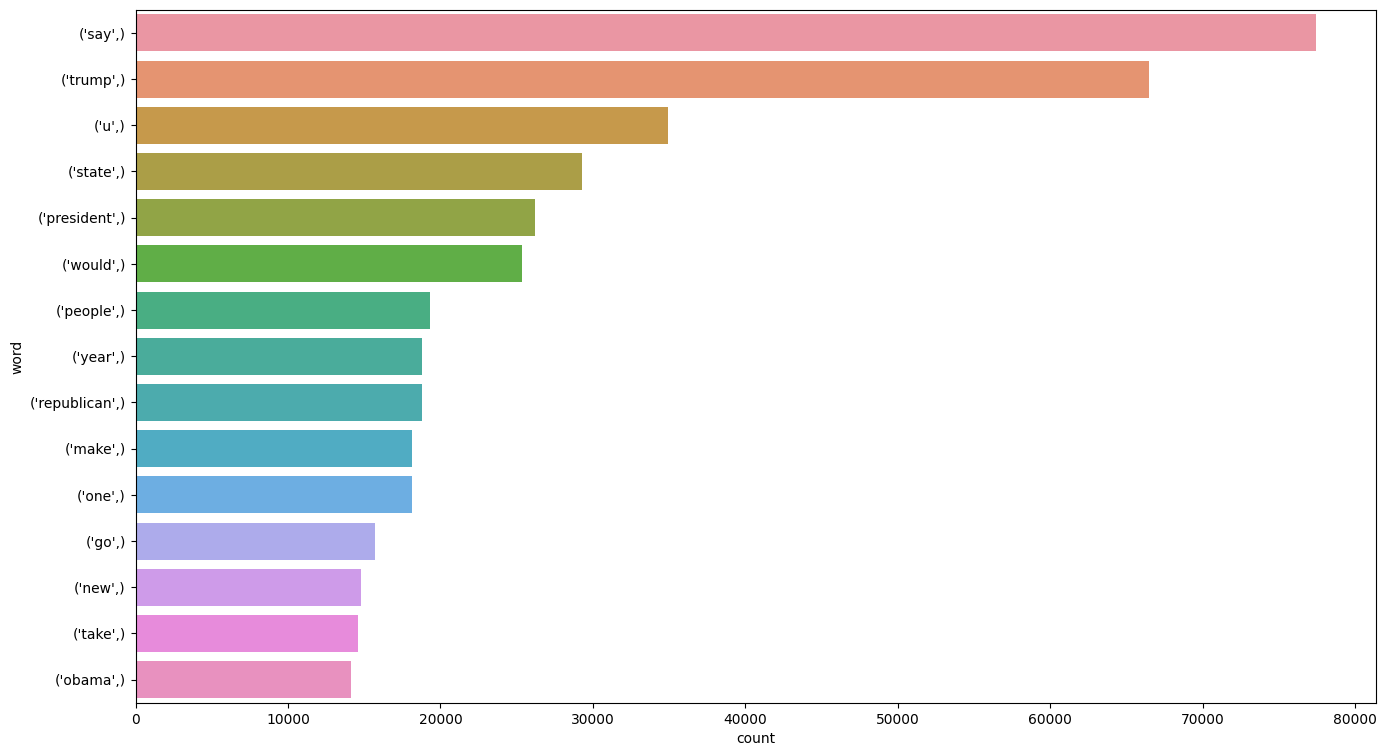

In [49]:
draw_n_gram(string,1)

                 word  count
0     (donald, trump)  11295
1      (unite, state)   8534
2      (white, house)   7190
3  (hillary, clinton)   4552
4         (new, york)   4140


<Axes: xlabel='count', ylabel='word'>

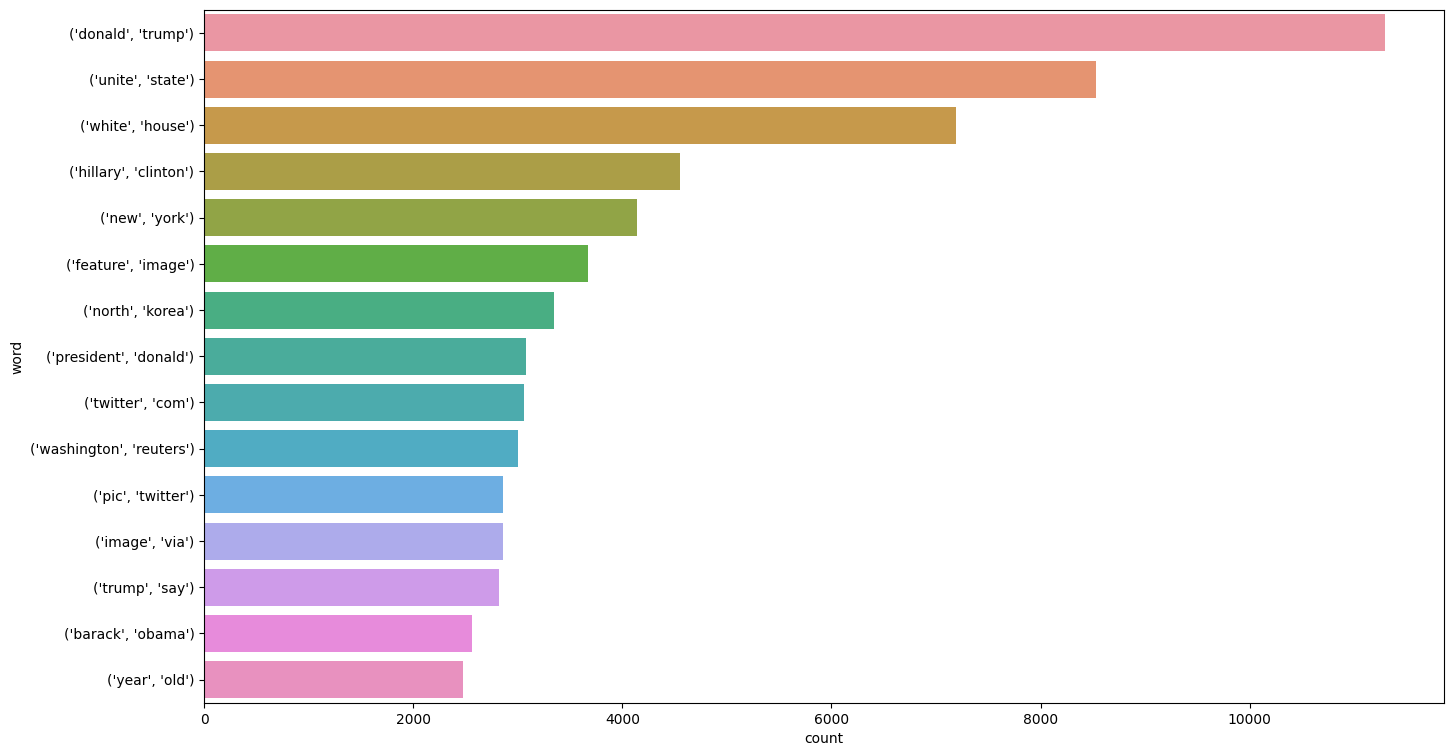

In [50]:
draw_n_gram(string,2)

                         word  count
0  (president, donald, trump)   3017
1         (pic, twitter, com)   2862
2       (feature, image, via)   2738
3  (president, barack, obama)   1725
4      (u, president, donald)   1150


<Axes: xlabel='count', ylabel='word'>

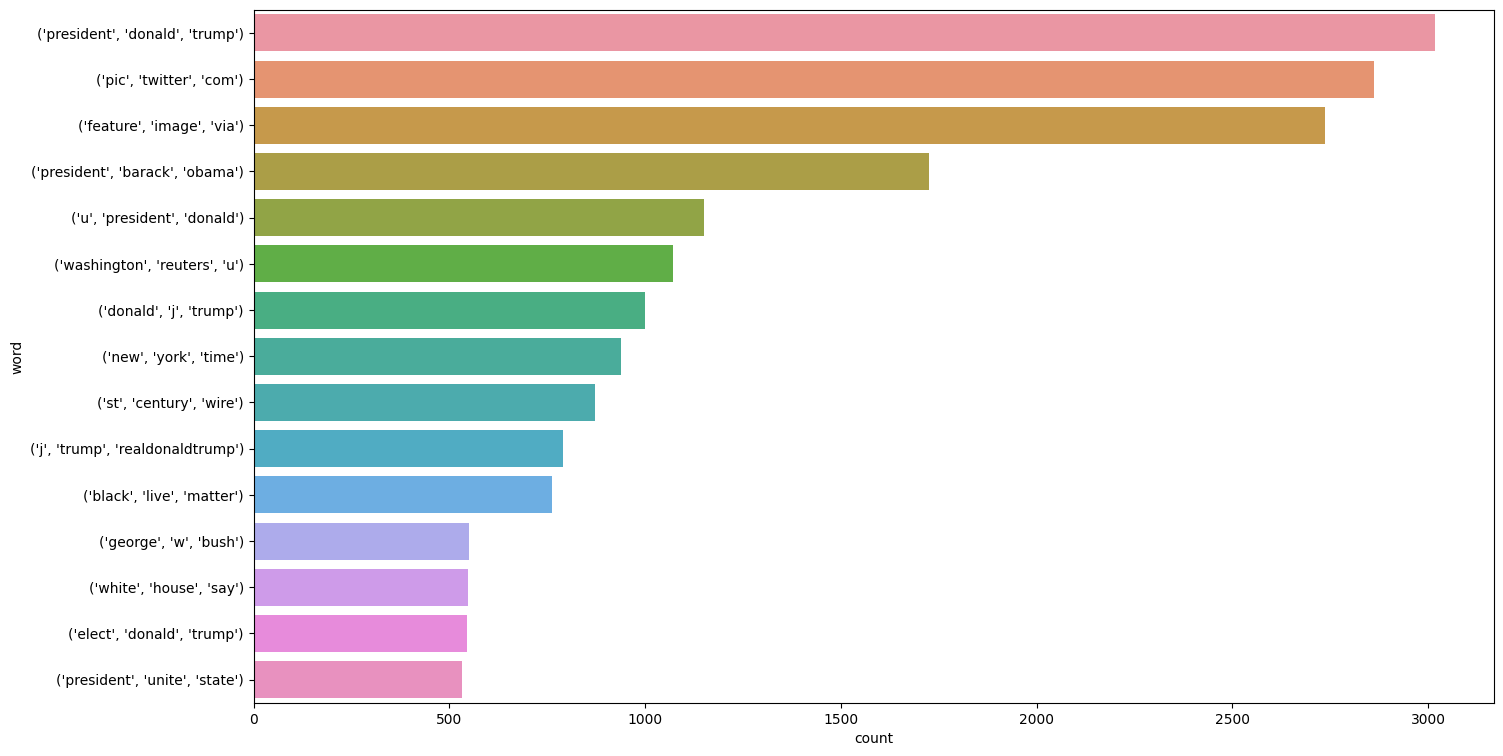

In [51]:
draw_n_gram(string,3)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['target'], test_size=0.2,random_state=42)


In [53]:
print(X_train.shape, X_test.shape)

(16000,) (4000,)


In [54]:
max_features = 10000
maxlen = 5000

In [55]:

from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen)


In [56]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [57]:
batch_size = 256
embed_size = 100

In [58]:


#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(max_features,embed_size,input_length=maxlen))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 100)         1000000   
                                                                 
 dropout (Dropout)           (None, 5000, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [60]:


# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [61]:

history = model.fit(X_train, y_train, validation_split=0.3, epochs=8, batch_size=batch_size, shuffle=True, verbose=1, callbacks=[early_stop])



Epoch 1/8
44/44 [==============================] - 31s 587ms/step - loss: 0.4229 - accuracy: 0.7985 - val_loss: 0.2337 - val_accuracy: 0.9035
Epoch 2/8
44/44 [==============================] - 25s 566ms/step - loss: 0.1131 - accuracy: 0.9627 - val_loss: 0.0983 - val_accuracy: 0.9646
Epoch 3/8
44/44 [==============================] - 26s 601ms/step - loss: 0.0451 - accuracy: 0.9873 - val_loss: 0.0864 - val_accuracy: 0.9723
Epoch 4/8
44/44 [==============================] - 26s 591ms/step - loss: 0.0231 - accuracy: 0.9945 - val_loss: 0.0902 - val_accuracy: 0.9746
Epoch 5/8
44/44 [==============================] - 26s 578ms/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.0874 - val_accuracy: 0.9737
Epoch 6/8
44/44 [==============================] - 33s 756ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0912 - val_accuracy: 0.9715


In [62]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

500/500 [==============================] - 31s 63ms/step - loss: 0.0314 - accuracy: 0.9909
Accuracy of the model on Training Data is -  99.09374713897705 %
125/125 [==============================] - 8s 62ms/step - loss: 0.0734 - accuracy: 0.9753
Accuracy of the model on Testing Data is -  97.52500057220459 %


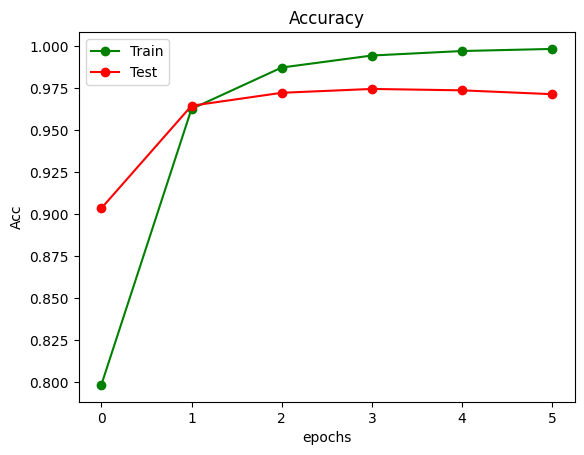

In [63]:
plt.figure()
plt.plot(history.history["accuracy"], "go-", label = "Train")
plt.plot(history.history["val_accuracy"], "ro-",label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()




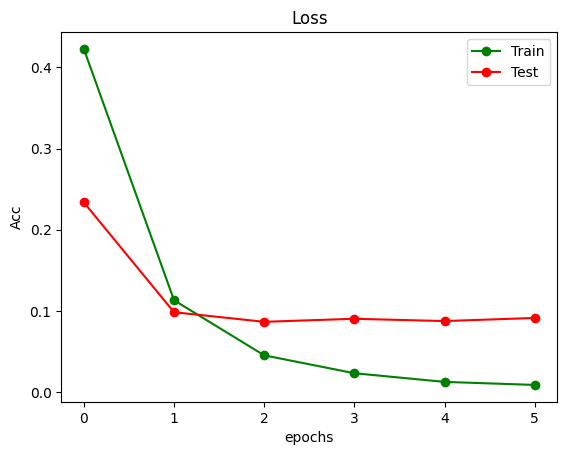

In [64]:
plt.figure()
plt.plot(history.history["loss"], "go-" ,label = "Train")
plt.plot(history.history["val_loss"],"ro-", label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import classification_report

# Predicting labels for test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Creating classification report
classification_report = classification_report(y_test, y_pred, target_names=['Fake', 'True'])
print(classification_report)

125/125 [==============================] - 8s 63ms/step
              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98      2110
        True       0.97      0.98      0.97      1890

    accuracy                           0.98      4000
   macro avg       0.97      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



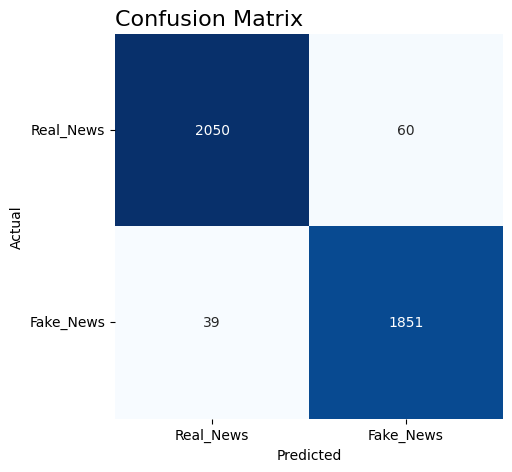

In [66]:
import seaborn as sns
class_names = ['Real_News', 'Fake_News']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names, rotation=0)
plt.show()

In [67]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2050   60]
 [  39 1851]]


In [68]:
########################################################################################

In [69]:
###Unsupervised
!pip install --upgrade keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:

latent_dim = 100

generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_dim=latent_dim),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.Dense(data.shape[1], activation='tanh')
])

In [71]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_dim=data.shape[1]),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [72]:
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))
discriminator.trainable = False


In [73]:
gan_input = tf.keras.layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))

gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

In [74]:
#To train the GAN model, we will first define a function to generate random samples of the latent space and use them as input to the generator:

def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape((n_samples, latent_dim))
    return x_input

def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    x_fake = generator.predict(x_input)
    y_fake = np.zeros((n_samples, 1))
    return x_fake, y_fake



In [75]:
# Function to train the GAN model
def train_gan(generator, discriminator, gan, df, latent_dim, n_epochs=100, batch_size=128):
    half_batch = int(batch_size / 2)

    for epoch in range(n_epochs):
        # Train discriminator
        x_real, y_real = df.sample(half_batch)['text'].to_numpy(), np.ones((half_batch, 1))
        discriminator_loss_real = discriminator.train_on_batch(x_real, y_real)

        x_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
        discriminator_loss_fake = discriminator.train_on_batch(x_fake, y_fake)
        discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

        # Train generator
        x_gan = generate_latent_points(latent_dim, batch_size)
        y_gan = np.ones((batch_size, 1))
        generator_loss = gan.train_on_batch(x_gan, y_gan)

        print(f'Epoch {epoch+1}/{n_epochs} | Discriminator Loss: {discriminator_loss} | Generator Loss: {generator_loss}')



In [76]:
n_fake_samples = 10000
x_fake, y_fake = generate_fake_samples(generator, latent_dim, n_fake_samples)
df_fake = pd.DataFrame({'text': x_fake[:,0], 'target': y_fake[:,0], 'clean_text': x_fake[:,0]})


313/313 [==============================] - 1s 3ms/step


In [77]:
df_fake.sample(5)

,text,target,clean_text
2130,0.237932,0.0,0.237932
5245,0.237065,0.0,0.237065
7041,0.496412,0.0,0.496412
1881,0.178711,0.0,0.178711
7018,0.052079,0.0,0.052079


In [78]:
grouped_n = df_fake.groupby("target").count()
grouped_n["text"]

target
0.0    10000
Name: text, dtype: int64

In [79]:
df_augmented = pd.concat([data, df_fake], ignore_index=True)
df_augmented = df_augmented.sample(frac=1).reset_index(drop=True)

In [80]:
# Drop any rows with null or NaN values in the 'text' column
df_augmented.dropna(subset=['text', 'target'], inplace=True)


In [81]:
df_augmented.shape

(30000, 3)

In [82]:
df_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        30000 non-null  object 
 1   target      30000 non-null  float64
 2   clean_text  30000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 703.2+ KB


In [83]:
from imblearn.over_sampling import RandomOverSampler

# Split the augmented dataset into X and y
X = df_augmented['text'].values.reshape(-1, 1)
y = df_augmented['target']

# Define the oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [84]:
from imblearn.over_sampling import RandomOverSampler

# Split the augmented dataset into X and y
X = df_augmented['text'].values.reshape(-1, 1)
y = df_augmented['target']

# Define the oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [85]:
# Combine the resampled X and y into a new dataframe
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=['text']), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

In [86]:
grouped_n = df_resampled.groupby("target").count()
grouped_n["text"]

target
0.0    20523
1.0    20523
Name: text, dtype: int64

In [87]:
# split into train and test sets
from sklearn.model_selection import train_test_split


In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled['text'], df_resampled['target'], test_size=0.2)


In [89]:
# vectorize text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [90]:
# Drop any rows with null or NaN values in the 'text' column


vectorizer = TfidfVectorizer(stop_words='english')
# Fit the vectorizer on the training data and transform the training and testing data
X_train_vec = vectorizer.fit_transform(X_train.astype(str))
X_test_vec = vectorizer.transform(X_test.astype(str))

In [91]:
# Create a Logistic Regression classifier and train it on the vectorized training data

clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

LogisticRegression()

In [92]:
# Evaluate the accuracy of the trained classifier on the testing data
accuracy = clf.score(X_test_vec, y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9890377588306942


In [93]:
from sklearn.metrics import classification_report

# Predicting labels for test data
y_pred = clf.predict(X_test_vec)

# Creating classification report
classification_report = classification_report(y_test, y_pred, target_names=['Fake', 'True'])
print(classification_report)

              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      4057
        True       0.98      1.00      0.99      4153

    accuracy                           0.99      8210
   macro avg       0.99      0.99      0.99      8210
weighted avg       0.99      0.99      0.99      8210



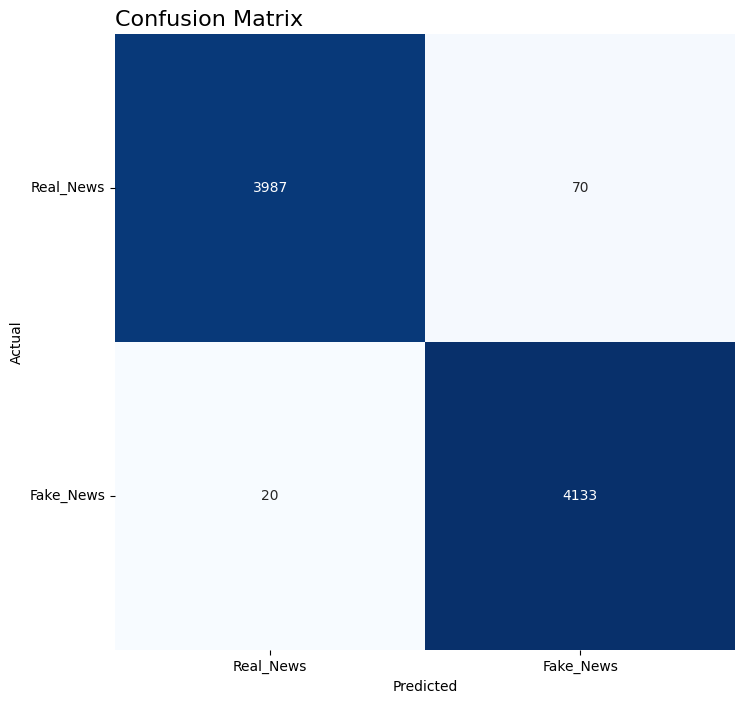

In [94]:
import seaborn as sns
class_names = ['Real_News', 'Fake_News']
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names, rotation=0)
plt.show()

In [95]:
########################################################################################

In [96]:
#State of art machine learning

In [97]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], stratify = data['target'], test_size = 0.2, random_state = 10)

In [99]:
print(X_train.shape)
print(X_test.shape)

(16000,)
(4000,)


In [100]:
from transformers import AutoTokenizer

In [101]:
def tokenize(X):
   X = tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
   return X

In [102]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [103]:
X_train_tokens = tokenize(X_train)
X_test_tokens = tokenize(X_test)

In [104]:
Length = 100

def get_model():
  dropout_rate = 0.2
  input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
  input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')
  embeddings = bert([input_ids, input_mask])[1] #pooler output
  print(embeddings)
  out = Dropout(0.2)(embeddings)

     #64 units dense layer
  out = Dense(64,activation = 'relu')(out)
  out = Dropout(0.2)(out)
  y = Dense(1,activation = 'sigmoid')(out)
  model = Model(inputs=[input_ids, input_mask], outputs=y)
  model.layers[2].trainable = True
  optimizer = Adam(learning_rate=1e-05, epsilon=1e-08,clipnorm=1.0)
    #complile the model
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
  return model

In [105]:
   #define optimizer
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model'")


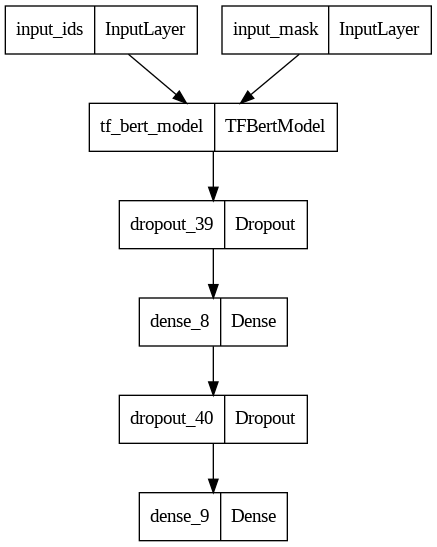

In [106]:
model = get_model()
tf.keras.utils.plot_model(model)

In [107]:
from keras.callbacks import EarlyStopping

In [108]:
history = model.fit(x = {'input_ids':X_train_tokens['input_ids'],'input_mask':X_train_tokens['attention_mask']}, y = y_train, epochs=3, validation_split = 0.2, batch_size = 64, callbacks=[EarlyStopping( monitor='val_accuracy' ,mode='max', patience=3,verbose=False,restore_best_weights=True)])


Epoch 1/3
200/200 [==============================] - 343s 1s/step - loss: 0.1079 - accuracy: 0.9630 - val_loss: 0.0150 - val_accuracy: 0.9978
Epoch 2/3
200/200 [==============================] - 265s 1s/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0155 - val_accuracy: 0.9978
Epoch 3/3
200/200 [==============================] - 264s 1s/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0130 - val_accuracy: 0.9978


In [109]:
# ypred = np.where(model.predict({ 'input_ids' : X_test_tokens['input_ids'] , 'input_mask' : X_test_tokens['attention_mask']}) >=0.5,1,0)

yhat = np.where(model.predict({ 'input_ids' : X_test_tokens['input_ids'] , 'input_mask' : X_test_tokens['attention_mask']}) >=0.5,1,0)

125/125 [==============================] - 28s 205ms/step


In [115]:
# your code here

ypred = np.where(model.predict({ 'input_ids' : X_test_tokens['input_ids'] , 'input_mask' : X_test_tokens['attention_mask']}) >=0.5,1,0)



125/125 [==============================] - 26s 206ms/step


In [116]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ypred)
print(accuracy)

0.998


In [114]:
from sklearn.metrics import classification_report


cl = classification_report(y_test, ypred)
print(cl)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2105
           1       1.00      1.00      1.00      1895

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



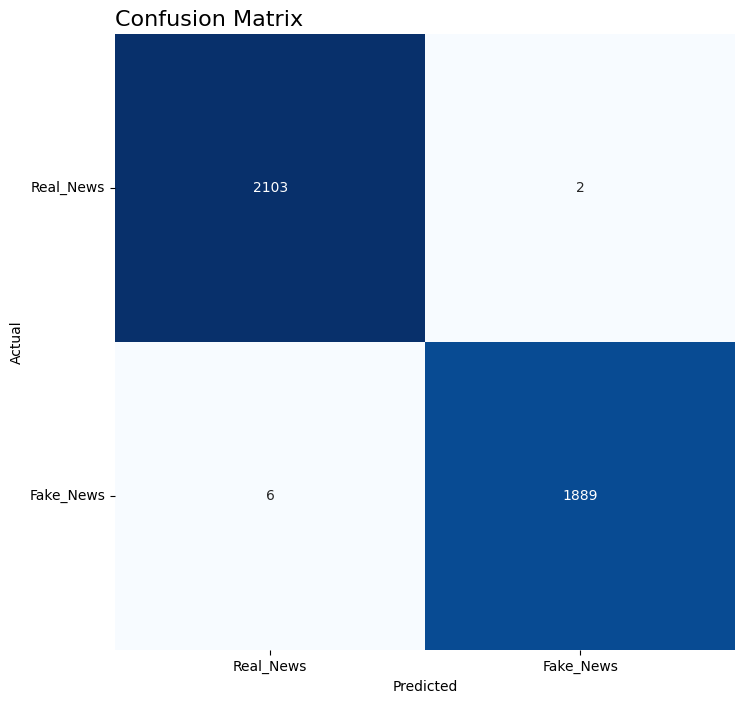

In [117]:
import seaborn as sns
class_names = ['Real_News', 'Fake_News']
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names, rotation=0)
plt.show()

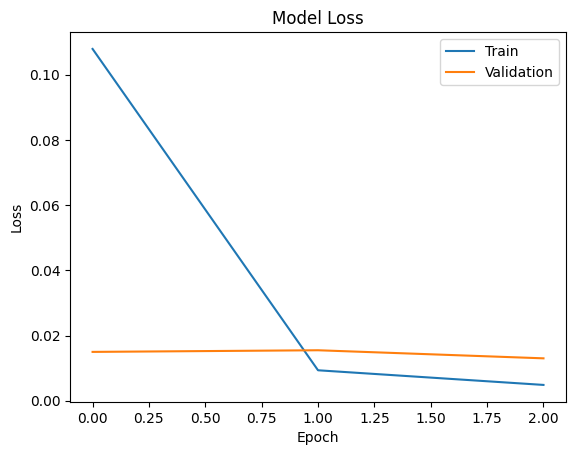

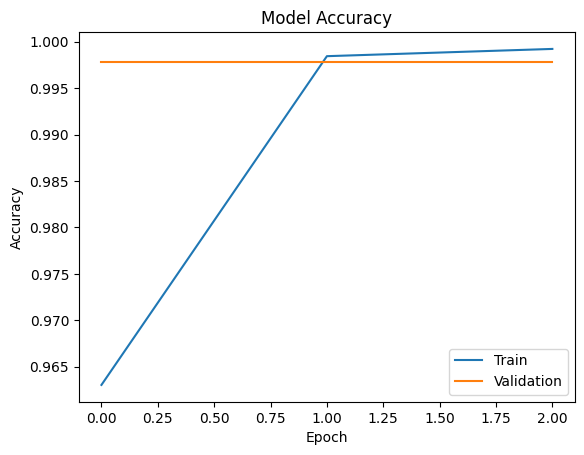

In [111]:

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()